In [7]:
import zipfile
import pandas as pd

In [8]:
# Nom du fichier ZIP
nom_zip = "titanic dataset.zip"

# Ouvrir le fichier ZIP
with zipfile.ZipFile(nom_zip, 'r') as zipf:
    for fichier in zipf.namelist():  # Liste des fichiers dans le ZIP
        # Ouvrir chaque fichier CSV et le lire avec pandas
        with zipf.open(fichier) as f:
            df = pd.read_csv(f)
            print("Types de données dans chaque colonne:")
            print(df.dtypes)
            print(df.head())
            #print(df.info()) 
            #print(df.describe()) 

Types de données dans chaque colonne:
PassengerId    int64
Survived       int64
dtype: object
   PassengerId  Survived
0          892         0
1          893         1
2          894         0
3          895         0
4          896         1
Types de données dans chaque colonne:
PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (H

In [9]:
nb_lignes_avant = df.shape[0]
# Nombre de lignes AVANT suppression des doublons
print("Nombre de lignes avant suppression :", nb_lignes_avant)
df.duplicated().sum()
#zero double

Nombre de lignes avant suppression : 891


0

In [10]:
# Suppression des doublons
df_sans_doublons = df.drop_duplicates()

In [11]:
nb_lignes_apres = df_sans_doublons.shape[0]
# Nombre de lignes APRÈS suppression des doublons
print("Nombre de lignes après suppression :", nb_lignes_apres)

Nombre de lignes après suppression : 891


In [12]:

# Vérifier les valeurs manquantes par colonne
missing_values = df.isnull().sum()

# Afficher uniquement les colonnes qui ont des valeurs manquantes
missing_columns = missing_values[missing_values > 0]
print("Colonnes avec des valeurs manquantes :\n", missing_columns)
df_cleaned = df.dropna()  # Supprime les lignes avec des valeurs NaN

Colonnes avec des valeurs manquantes :
 Age         177
Cabin       687
Embarked      2
dtype: int64


In [13]:
print("Avant suppression :", df.shape[0])
print("Après suppression :", df_cleaned.shape[0])

Avant suppression : 891
Après suppression : 183


In [14]:
# Remplacer les valeurs NaN par la moyenne des colonnes numériques
df_filled = df.fillna(df.mean(numeric_only=True))
# avec une valeur constante adapter 
df["Age"] = df["Age"].fillna(df["Age"].median())
df["Cabin"] = df["Cabin"].fillna("Unknown")
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0]) 

In [15]:
#Exo3
#Créez de nouvelles fonctionnalités
df["FamilySize"] = df["SibSp"] + df["Parch"]
#extraites de la Name colonne.
df["Title"] = df["Name"].apply(lambda x: x.split(",")[1].split(".")[0].strip())
#Convertissez les variables catégorielles

In [18]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Appliquer le Label Encoding à chaque colonne catégorielle
df['Name'] = label_encoder.fit_transform(df['Name'])
df['Sex'] = label_encoder.fit_transform(df['Sex'])
df['Ticket'] = label_encoder.fit_transform(df['Ticket'])
df['Cabin'] = label_encoder.fit_transform(df['Cabin'])
df['Embarked'] = label_encoder.fit_transform(df['Embarked'])


df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Title
0,1,0,3,108,1,22.0,1,0,523,7.2500,147,2,1,Mr
1,2,1,1,190,0,38.0,1,0,596,71.2833,81,0,1,Mrs
2,3,1,3,353,0,26.0,0,0,669,7.9250,147,2,0,Miss
3,4,1,1,272,0,35.0,1,0,49,53.1000,55,2,1,Mrs
4,5,0,3,15,1,35.0,0,0,472,8.0500,147,2,0,Mr


In [22]:
from sklearn.preprocessing import MinMaxScaler
# je normalise que age et Fare
scaler = MinMaxScaler()
df['Age_normalized'] = scaler.fit_transform(df[['Age']])
scaler = MinMaxScaler()
print(df.dtypes)

PassengerId          int64
Survived             int64
Pclass               int64
Name                 int32
Sex                  int32
Age                float64
SibSp                int64
Parch                int64
Ticket               int32
Fare               float64
Cabin                int32
Embarked             int32
FamilySize           int64
Title               object
Age_normalized     float64
Fare_normalized    float64
dtype: object


In [23]:
#Exo4
import pandas as pd

# Exemple de jeu de données df
# Calcul de Q1 (25e percentile) et Q3 (75e percentile)
Q1_fare = df['Fare'].quantile(0.25)
Q3_fare = df['Fare'].quantile(0.75)
IQR_fare = Q3_fare - Q1_fare

Q1_age = df['Age'].quantile(0.25)
Q3_age = df['Age'].quantile(0.75)
IQR_age = Q3_age - Q1_age

# Définir les valeurs aberrantes pour Fare
outliers_fare = df[(df['Fare'] < (Q1_fare - 1.5 * IQR_fare)) | (df['Fare'] > (Q3_fare + 1.5 * IQR_fare))]

# Définir les valeurs aberrantes pour Age
outliers_age = df[(df['Age'] < (Q1_age - 1.5 * IQR_age)) | (df['Age'] > (Q3_age + 1.5 * IQR_age))]

# Affichage des résultats
print("Valeurs aberrantes dans Fare :")
print(outliers_fare)

print("\nValeurs aberrantes dans Age :")
print(outliers_age)



Valeurs aberrantes dans Fare :
     PassengerId  Survived  Pclass  Name  Sex   Age  SibSp  Parch  Ticket  \
1              2         1       1   190    0  38.0      1      0     596   
27            28         0       1   260    1  19.0      3      2      95   
31            32         1       1   776    0  28.0      1      0     586   
34            35         0       1   535    1  28.0      1      0     600   
52            53         1       1   333    0  49.0      1      0     587   
..           ...       ...     ...   ...  ...   ...    ...    ...     ...   
846          847         0       3   720    1  28.0      8      2     568   
849          850         1       1   291    0  28.0      1      0      84   
856          857         1       1   860    0  45.0      1      1     453   
863          864         0       3   718    0  28.0      8      2     568   
879          880         1       1   668    0  56.0      0      1      59   

         Fare  Cabin  Embarked  FamilySize T

In [ ]:
import numpy as np
df['Fare'] = np.log1p(df['Fare'])
df['Age'] = np.log1p(df['Age'])
# elle a réduit l'impact des valeurs extrêmes en conservant les tendances dans les données.


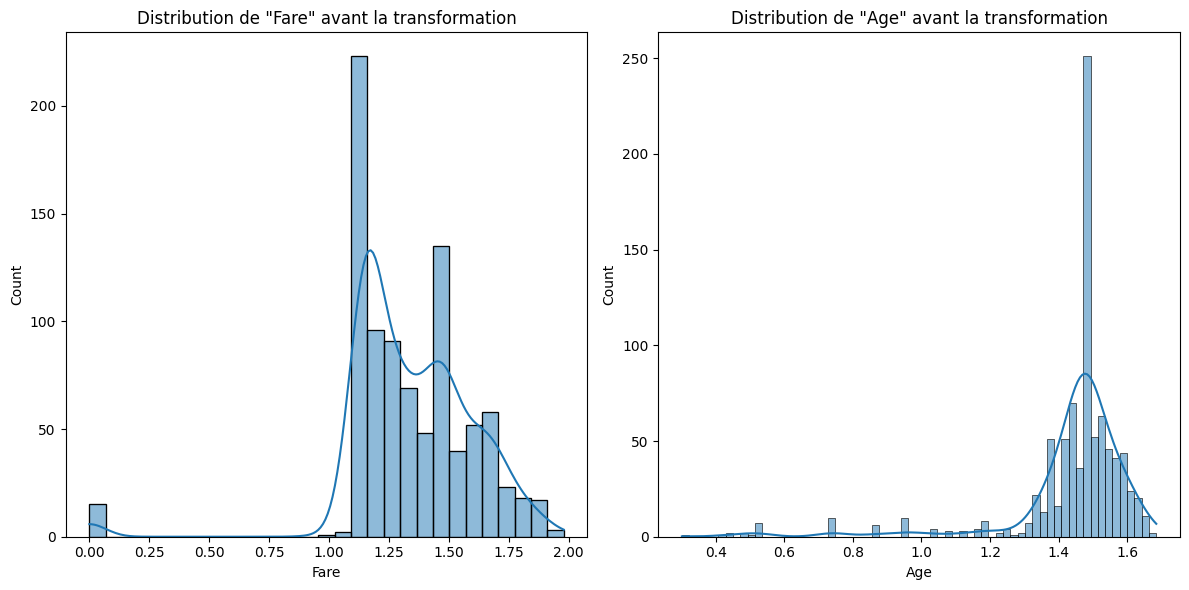

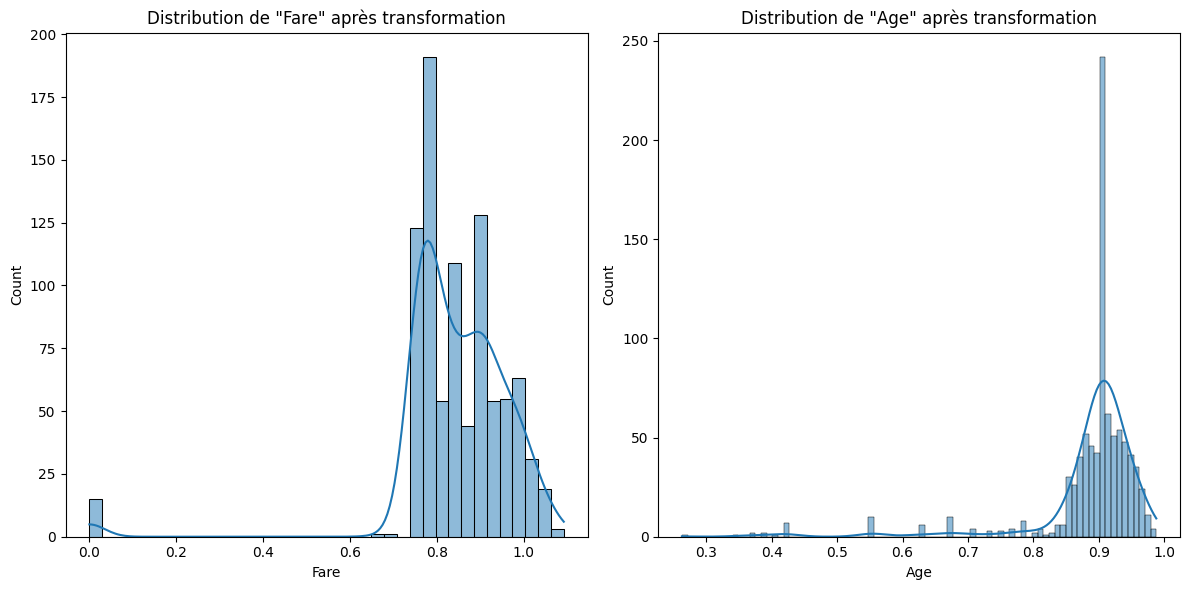

Statistiques avant transformation (Fare) :
count    891.000000
mean       0.843253
std        0.139949
min        0.000000
25%        0.769714
50%        0.840929
75%        0.914863
max        1.091839
Name: Fare, dtype: float64

Statistiques après transformation (Fare) :
count    891.000000
mean       0.607852
std        0.091844
min        0.000000
25%        0.570818
50%        0.610270
75%        0.649646
max        0.738043
Name: Fare, dtype: float64

Statistiques avant transformation (Age) :
count    891.000000
mean       0.888391
std        0.088649
min        0.262819
25%        0.883605
50%        0.905894
75%        0.925237
max        0.987819
Name: Age, dtype: float64

Statistiques après transformation (Age) :
count    891.000000
mean       0.634464
std        0.052034
min        0.233346
25%        0.633188
50%        0.644951
75%        0.655049
max        0.687038
Name: Age, dtype: float64


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Avant la transformation, visualisez la distribution de "Fare" et "Age"
plt.figure(figsize=(12, 6))

# Distribution de "Fare" avant la transformation
plt.subplot(1, 2, 1)
sns.histplot(df['Fare'], kde=True)
plt.title('Distribution de "Fare" avant la transformation')

# Distribution de "Age" avant la transformation
plt.subplot(1, 2, 2)
sns.histplot(df['Age'], kde=True)
plt.title('Distribution de "Age" avant la transformation')

plt.tight_layout()
plt.show()

# Appliquer la transformation log sur "Fare" et "Age"
df['Fare'] = np.log1p(df['Fare'])  # log(1 + x) pour éviter les valeurs nulles ou négatives
df['Age'] = np.log1p(df['Age'])    # log(1 + x) pour éviter les valeurs nulles ou négatives

# Après la transformation, visualisez les distributions
plt.figure(figsize=(12, 6))

# Distribution de "Fare" après la transformation
plt.subplot(1, 2, 1)
sns.histplot(df['Fare'], kde=True)
plt.title('Distribution de "Fare" après transformation')

# Distribution de "Age" après la transformation
plt.subplot(1, 2, 2)
sns.histplot(df['Age'], kde=True)
plt.title('Distribution de "Age" après transformation')

plt.tight_layout()
plt.show()

# Comparer les valeurs avant et après transformation
print("Statistiques avant transformation (Fare) :")
print(df['Fare'].describe())

print("\nStatistiques après transformation (Fare) :")
print(np.log1p(df['Fare']).describe())

print("\nStatistiques avant transformation (Age) :")
print(df['Age'].describe())

print("\nStatistiques après transformation (Age) :")
print(np.log1p(df['Age']).describe())
